El objetivo de este análisis es que comparen la temperatura efectiva del Sol que obtuvieron ustedes a partir del máximo del espectro con el que se obtiene a partir de un ajuste por la fórmula de radiación de un cuerpo negro.


La radiancia espectral $ B(\lambda, T) $ de un cuerpo negro a una temperatura $T $ y longitud de onda $ \lambda $ está dada por:

$$
B(\lambda, T) = \frac{2 h c^2}{\lambda^5} \cdot \frac{1}{e^{\frac{h c}{\lambda k_B T}} - 1}
$$

donde:

*   h es la constante de Planck
*   c es la velocidad de la luz en el vacío
*   k_B es la constante de Boltzmann
*   T es la temperatura absoluta del cuerpo negro (en Kelvin)

Lo ideal sería entonces ajustar los datos que ustedes obtuvieron por esa fórmula y de allí obtener la temperatura efectiva. Sin embargo, eso no funciona, y la razón de eso pueden inferirla de la siguiente imagen:


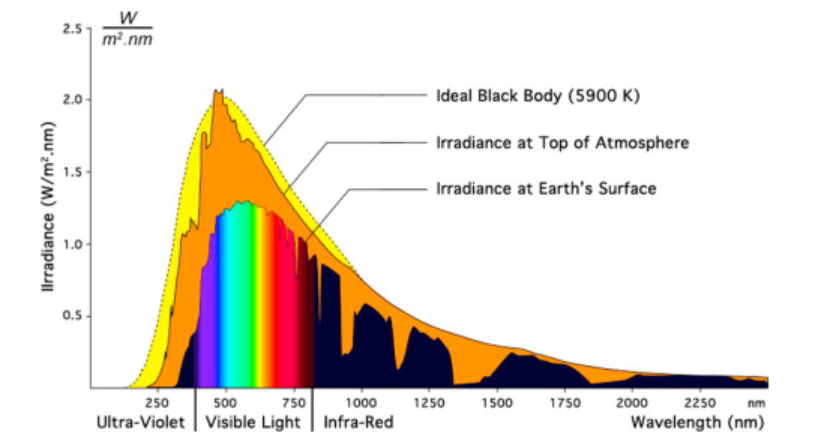

Además, piensen que ustedes sacaron el espectro con una cámara. ¿En qué podría influir eso?


Entonces, vamos a hacerlo con datos extraidos de "National Renewable Energy Laboratory (NREL)". De [acá](https://www.nrel.gov/grid/solar-resource/spectra.html) pueden sacar los datos. El código está hecho para que funcione de una el archivo .txt de "Synthetic Gueymard Spectrum" (sí... son sintéticos). Para descargarlo, apretan donde dice "text file" y en la página que se les abre tocan click derecho en algun lado, luego "Guardar cómo..." y se lo bajan. Sí alguien quiere usar otro de los datos que están ahí, puede sin problema. Lo que sí, no prometemos que funcione el código que está abajo.


Una vez tengan el archivo, deben subirlo a Colab. Para eso, pueden ver una carpeta a la izquierda que se llama "Archivos". Tocan ahí y arrastran el archivo (o tocan el botón para subirlo). Ahora, vamos al código:

In [ ]:
#Lo primero que vamos a hacer es importar todas las librerías que vamos a usar.
#Esto no importa mucho, simplemente nos facilitan la vida.
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

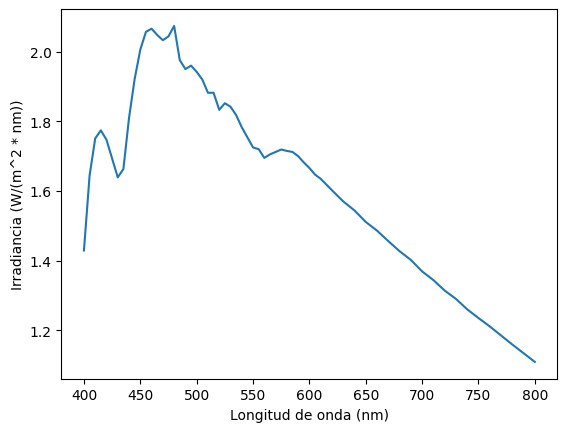

In [5]:
#Indicamos el nombre del archivo, como sea que lo guardaron. Nosotros dejamos el default.
file_path = 'thekaekara.txt'

#Leemos el archivo. Extraemos las primeras dos columnas, donde está la información que nos importa.
data = np.loadtxt(file_path, usecols=(0,1),skiprows=10,encoding='latin-1')
first_column = data.T[0]
second_column = data.T[1]

#Acoto el rango de longitudes de onda. Acá tomamos entre 400 a 800 nm pero lo pueden cambiar e incluir más!
mask = (first_column >= 400) & (first_column <= 800)
wavelengths_nm = first_column[mask]
irradiancia = second_column[mask]

#Graficamos estos datos
plt.plot(wavelengths_nm,irradiancia)
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Irradiancia (W/(m^2 * nm))')
plt.show()

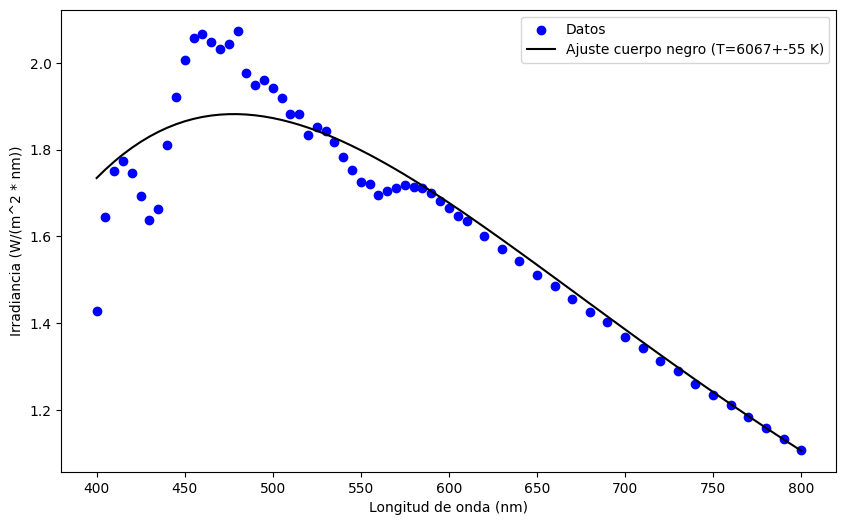

In [7]:
#Definimos una función que, dada una longitud de onda en nanómetros, una temperatura y un parámetro arbitrario a (para ajustar la escala nomás), devuelva la radiancia espectral.
#Esta es simplemente la función que les mostramos mas arriba.
def blackbody_radiation(wavelengths_nm, T,a):
    h = 6.626e-34  # Constante de Planck (J*s)
    c = 3.0e8      # Velocidad de la luz (m/s)
    k_B = 1.381e-23 # Constante de Boltzmann (J/K)

    # Convertimos la longitud de onda a metros
    wavelengths_m = wavelengths_nm * 1e-9

    # Fórmula de la ley de Planck. Defino el numerador y denominador por separado porque son un choclo.
    numerador = a*2 * h * c**2
    denominador = wavelengths_m**5 * (np.exp(h * c / (wavelengths_m * k_B * T)) - 1)

    irradiancia = numerador / denominador
    return irradiancia

#Esto encuentra los mejores valores de "a" y "T" para que la función de ajuste sea la que mas se parezca a los datos.
popt,pcov= curve_fit(blackbody_radiation, wavelengths_nm, irradiancia, p0=[6000,1e-22])

#Obtenemos los mejores valores para ajustar a los datos:
T,a = popt[0],popt[1]

#Obtenemos también los errores de estos valores:
T_error, a_error = np.sqrt(np.diag(pcov))

#Generamos los datos ajustados:
fitted_irradiance = blackbody_radiation(wavelengths_nm, T,a)

#Graficamos los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.scatter(wavelengths_nm, irradiancia, label='Datos', color='blue') #Datos
plt.plot(wavelengths_nm, fitted_irradiance, label=f'Ajuste cuerpo negro (T={round(T)}+-{round(T_error)} K)', color='black') #Ajuste
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Irradiancia (W/(m^2 * nm))')
plt.legend()
plt.show()

Pueden jugar con este código cuanto quieran. Por ejemplo, pueden hacer un plot mucho las lindo visualmente si hacen un gradiente de color para los datos en función de su longitud de onda como les muestro mas abajo.

 Fijense qué pasa al tomar mas o menos puntos, ¿mejora o empeora el ajuste? ¿Da mas cercana la temperatura a la que encuentran tabulada? ¿Cómo es en comparación a la temperatura que obtuvieron ustedes con la Ley de Wien?

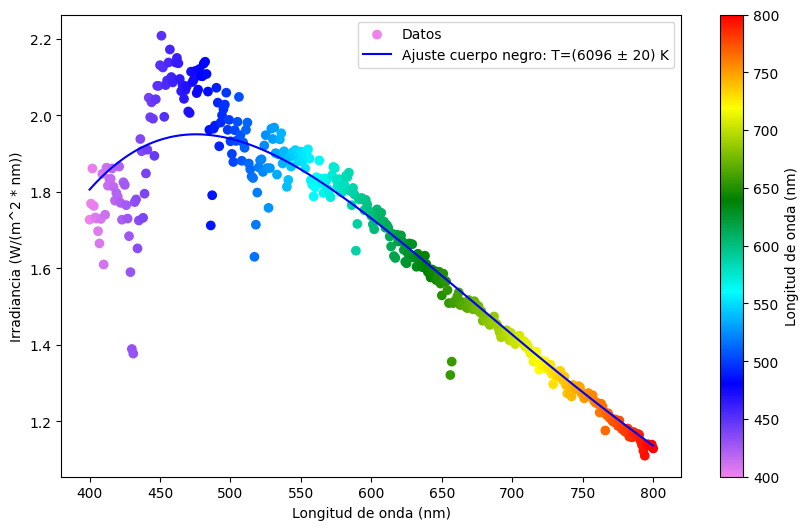